# 신경망 시작하기

## 신경망의 구조
* 신경망 훈련에는 다음 요소들이 관련되어 있습니다.
    * 네트워크(또는 모델)를 구성하는 층
    * 입력 데이터와 그에 상응하는 타깃
    * 학습에 사용할 피드백 신호를 정의하는 손실 함수
    * 학습 진행 방식을 결정하는 옵티마이저
    
### 층: 딥러닝의 구성 단위
* 신경망의 핵심적인 데이터 구조는 2장에서 소개한 층입니다. 층은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다. 어떤 종류의 층은 상태가 없지만 대부분의 경우 **가중치**라는 층의 상태를 가집니다. 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 지식이 담겨 있습니다.

In [1]:
from keras import models
from keras import layers

layer = layers.Dense(32, input_shape=(784,))
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))

### 모델: 층의 네트워크
* 가지(branch)가 2개인 네트워크
* 출력이 여러 개인 네트워크
* 인셉션(Inception) 블록

* 네트워크 구조는 가설 공간(hypothesis space)을 정의합니다. 1장에서 머신 러닝을 '가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것'으로 정의했는데 기억날지 모르겠습니다. 네트워크 구조를 선택함으로써 **가능성 있는 공간**(가설 공간)을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한하게 됩니다. 우리가 찾아야 할 것은 이런 텐서 연산에 포함된 가중치 텐서의 좋은 값입니다.

## 3.2 케라스 소개
※ 케라스의 특징은 다음과 같습니다.
* 동일한 코드로 CPU와 GPU에서 실행할 수 있습니다.
* 사용하기 쉬운 API를 가지고 있어 딥러닝 모델의 프로토타입을 빠르게 만들 수 있습니다.
* (컴퓨터 비전을 위한) 합성곱 신경망, (시퀀스 처리를 위한) 순환 신경망을 지원하며 이 둘을 자유롭게 조합하여 사용할 수 있습니다.
* 다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있습니다. 이 말은 적대성 생성 신경망(Generative Adversarial Network,GAN)부터 뉴럴 튜링 머신(Neural Turing Machine)까지 케라스는 기본적으로 어떤 딥러닝 모델에도 적합하다는 뜻입니다.

### 3.2.1 케라스, 텐서플로, 씨아노, CNTK
* 케라스는 딥러닝 모델을 만들기 위한 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리입니다. 텐서 조작이난 미분 같은 저수준의 연산을 다루지 않습니다. 그 대신 케라스의 **백엔드 엔진**(backend engine)에서 제공하는 최적화되고 특화된 텐서 라이브러리를 사용합니다.
* 현재는 텐서플로, 씨아노, 마이크로소프트 코그니티브 툴킷(Microsoft Cognitive Toolkit, CNTK) 3개를 백엔드 엔진으로 사용하 수 있습니다. 향후에는 더 많은 딥러닝 엔진을 케라스에서 사용할 수 있을 것입니다.
* 텐서플로, CNTK, 씨아노는 딥러닝을 위한 주요 플랫폼 중 하나입니다. 씨아노는 몬트리올 대학 MILA 연구소에서 개발했고, 텐서플로는 구글에서 개발했으며, CNTK는 마이크로소프트에서 개발했습니다. 케라스로 작성한 모든 코드는 아무런 변경 없이 이런 백엔드 중 하나를 선택해서 실행시킬 수 있습니다. 개발하는 중간에 하나의 백엔드가 특정 작업에 더 빠르다고 판단되면 언제든지 백엔드를 바꿀 수 있어 아주 유용합니다. 가장 널리 사용되고 확장성이 뛰어나며 상용 제품에 쓸 수 있기 때문에 대부분의 딥러닝 작업에 텐서플로 백엔드가 기본으로 권장됩니다.

### 3.2.2 케라스를 사용한 개발: 빠르게 둘러보기
* 이미 케라스 모델의 예로 MNIST 예제를 보았습니다. 전형적인 케라스 작업 흐름은 이 예제와 비슷합니다.
1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의합니다.
2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(또는 모델)를 정의합니다.
3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정합니다.
4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출합니다.
* 모델을 정의하는 방법은 두 가지인데, Sequential 클래스(가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크입니다) 또는 함수형 API(완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프를 만듭니다)를 사용합니다.
* Sequential 클래스를 사용하여 정의한 2개의 층으로 된 모델을 다시 보겠습니다(첫 번째 층에 입력 데이터의 크기가 전달된 점을 주목하세요).

In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

* 같은 모델을 함수형 API를 사용하여 만들어 보겠습니다.

In [6]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

* 함수형 API를 사용하면 모델이 처리할 데이터 텐서를 만들고 마치 함수처럼 이 텐서에 층을 적용합니다.

In [7]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

In [8]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

## 3.4 영화 리뷰 분류: 이진 분류 예제
* 2종 분류(two-class classification) 또는 이진 분류(binary classification)는 아마도 가장 널리 적용된 머신 러닝 문제일 것입니다. 이 예제에서 리뷰 텍스트를 기반으로 영화 리뷰를 긍정(positive)과 부정(negative)으로 분류하는 방법을 배우겠습니다.
### 3.4.1 IMDB 데이터셋
* MNIST 데이터셋처럼 IMDB 데이터셋도 케라스에 포함되어 있습니다. 이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있습니다. 여기서 각 숫자는 사전에 있는 고유한 단어를 나타냅니다.

In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\wnstj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\wnstj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [5]:
print(train_data[0])
print(train_labels[0])
print(max([max(sequence) for sequence in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999


### 3.4.2 데이터 준비
※ 신경망에 숫자 리스트를 주입할 수는 없습니다. 리스트를 텐서로 바꾸는 두 가지 방법이 있습니다.
* 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환합니다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다(Embedding 층을 말하며, 나중에 자세히 다루겠습니다).
* 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환합니다. 예를 들어 시퀀스 [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환합니다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용합니다.
    * 여기서는 두 번째 방식을 사용하고 이해를 돕기 위해 직접 데이터를 원-핫 벡터로 만들겠습니다.

In [7]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
# Encoding integer sequences into binary matrices
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
import numpy as np
print(x_train[0])
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


### 3.4.3 신경망 모델 만들기(create neural network model)
* 입력 데이터가 벡터고 레이블은 스칼라(1 또는 0)입니다. 아마 앞으로 볼 수 있는 문제 중에서 가장 간단할 것입니다. 이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결 층(즉 Dense(16, activation='relu'))을 그냥 쌓은 것입니다.

In [10]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 3.4.4 훈련 검증(Traning and Validation)
* 훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어야 합니다.

In [14]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 11s 319ms/step - loss: 0.5819 - acc: 0.6992 - val_loss: 0.3632 - val_acc: 0.8752
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3063 - acc: 0.9044 - val_loss: 0.3166 - val_acc: 0.8751
Epoch 3/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2189 - acc: 0.9319 - val_loss: 0.2771 - val_acc: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1618 - acc: 0.9537 - val_loss: 0.2819 - val_acc: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1357 - acc: 0.9588 - val_loss: 0.2982 - val_acc: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1118 - acc: 0.9674 - val_loss: 0.2952 - val_acc: 0.8872
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0920 - acc: 0.9728 - val_loss: 0.3183 - val_acc: 0.8828
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0733 -

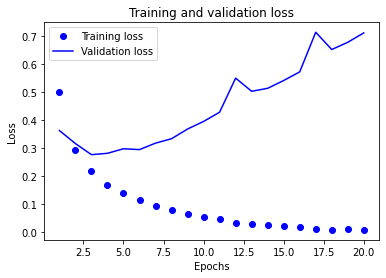

In [16]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[훈련과 검증 손실(Loss of training and verification)]

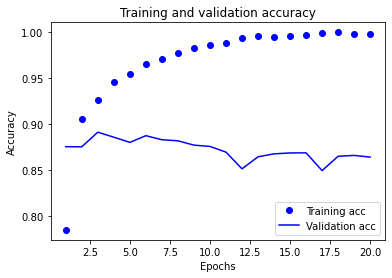

In [17]:
import matplotlib.pyplot as plt
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[훈련과 검증 정확도(Training and validation accuracy)]

* 여기에서 볼 수 있듯이 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로입니다. 검증 손실과 정확도는 이와 같지 않습니다. 네 번째 에포크에서 그래프가 역전되는 것 같습니다. 이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에서는 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례입니다. 정확한 용어로 말하면 과대적합(overfitting) 되었다고 합니다. 두 번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못합니다.
* 이런 경우에 과대적합을 방지하기 위해서 세 번째 에프크 이후에 훈련을 중지할 수 있습니다. 일반적으로 4장에서 보게 될 과대적합을 완화하는 다양한 종류의 기술을 사용할 수 있습니다.
* 처음부터 다시 새로운 신경망을 네 번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해보겠습니다.

※ SIGMOID vs SOFTMAX
* sigmoid는 이진 분류할 때 쓰고, softmax는 다중 분류할 때 쓴다고 머릿속에 남아있습니다.

In [18]:
# 모델을 처음부터 다시 훈련하기(retrain the model from the beginning)
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 11s 59ms/step - loss: 0.5422 - accuracy: 0.7552
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2711 - accuracy: 0.9119
Epoch 3/4
49/49 [==============================] - 1s 31ms/step - loss: 0.2004 - accuracy: 0.9319
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.2986 - accuracy: 0.8818


### 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기
* 모델을 훈련시킨 후에 이를 실전 환경에서 사용하고 싶을 것입니다. predict 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있습니다.

In [19]:
model.predict(x_test)

array([[0.15327615],
       [0.9993944 ],
       [0.65196043],
       ...,
       [0.08710217],
       [0.05207336],
       [0.423917  ]], dtype=float32)

## 3.5 뉴스 기사 분류: 다중 분류 문제
* 완전 연결된 신경망을 사용하여 벡터 입력을 어떻게 2개의 클래스로 분류하는지 보았습니다. 2개 이상의 클래스가 있을 때는 어떻게 해야 할까요?
* 이 절에서 로이터(Reuter) 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 보겠습니다. 클래스가 많기 때문에 이 문제는 다중 분류(multiclass classification)의 예입니다. 각 데이터 포인트가 정확히 하나의 범주로 분류되기 때문에 좀 더 정확히 말하면 단일 레이블 다중 분류(single-label, multiclass classification) 문제입니다. 각 데이터 포인트가 여러 개의 범주에 속할 수 있다면 이것은 다중 레이블 다중 분류(multi-label, multiclass classification)문제가 됩니다.

### 3.5.1 로이터 데이터셋
* 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.
* IMDB, MNIST와 마찬가지로 로이터 데이터셋은 케라스에 포함되어 있습니다. 한번 살펴보죠.

In [20]:
# 로이터 데이터셋 로드하기(Load Reuter Dataset)
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\wnstj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\wnstj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [23]:
print(len(train_data))
print(len(test_data))
print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [24]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
print(train_labels[10])

557056/550378 [==============================] - 0s 0us/step
3
